#Actividad 3 
#Entrenamiento de redes neuronales simple 

Emiliano Cavazos Rodriguz 1967273
IMTC Clase: LMV-N1

In [2]:
# Imortaremos TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Una vez importado escogeremos las librerias de ayuda que utilizaremos 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [3]:
#Importamos mnist y agregamos las etiquetas 

fashion_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']

11490434/11490434 [==============================] - 0s 0us/step


Despues exploramos el set de datos 

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

Una vez explorado tenemos que empezar a pro-procesar la informacion 

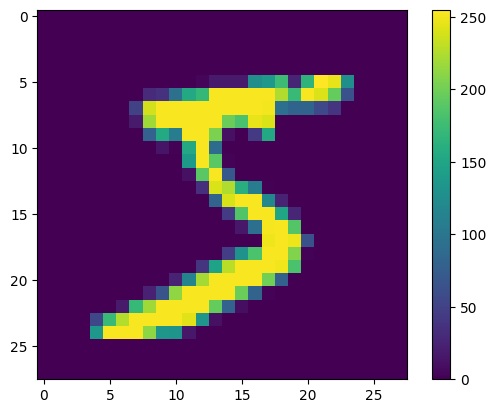

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
#Despues hay que procesar los valores en un rango de 0 a 1 que se logra diviendo las imagenes por el numero de pixeles (255)

train_images = train_images / 255.0

test_images = test_images / 255.0

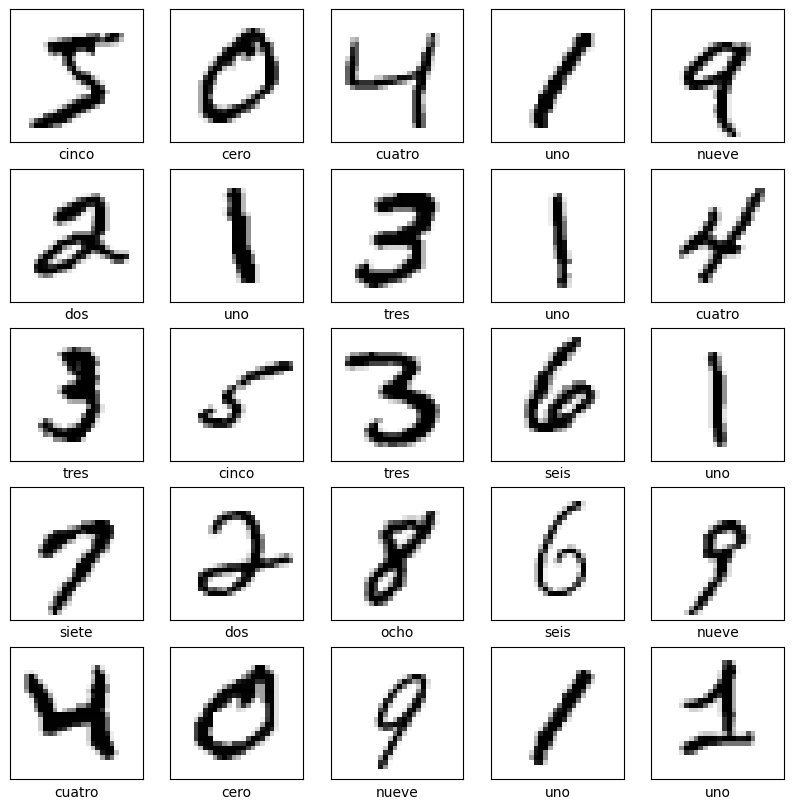

In [13]:
#Antes de entrenar la red tenemos que asegurarnos que este en el formato correcto 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Ahora tenemos que construir el modelo 

In [14]:
#hay que configurar las capas 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
#Una vez realizado tenemos que compilar el modelo 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#ahora si podemos empezar a entrenar al modelo 

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1767 - accuracy: 0.7173
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4884 - accuracy: 0.8729
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3835 - accuracy: 0.8942
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3421 - accuracy: 0.9036
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3183 - accuracy: 0.9095
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3021 - accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2900 - accuracy: 0.9168
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2797 - accuracy: 0.9197
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2709 - accuracy: 0.9220
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.262

In [17]:
#Una vez entrenada podemos evaluar su exactitud 

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2553 - accuracy: 0.9280 - 759ms/epoch - 2ms/step

Test accuracy: 0.9279999732971191


Con el modelo ya entrenado podemos comenzar a hacer predicciones 

In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([5.0073148e-05, 5.2300040e-09, 8.2758532e-05, 1.8682065e-03,
       1.7107563e-07, 4.9439725e-05, 2.1242201e-10, 9.9678504e-01,
       1.1182967e-05, 1.1532442e-03], dtype=float32)

In [20]:
np.argmax(predictions[0])

7

In [21]:
test_labels[0]

7

In [22]:
#hay que graficarlo para poder ver el set de las predcciones 

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

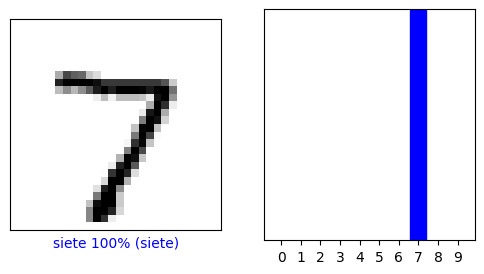

In [23]:
#pongamoslo aprueba con la imagen 0 

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

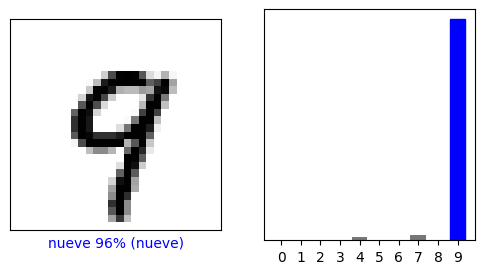

In [24]:
#ahora con la imagen 12 

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

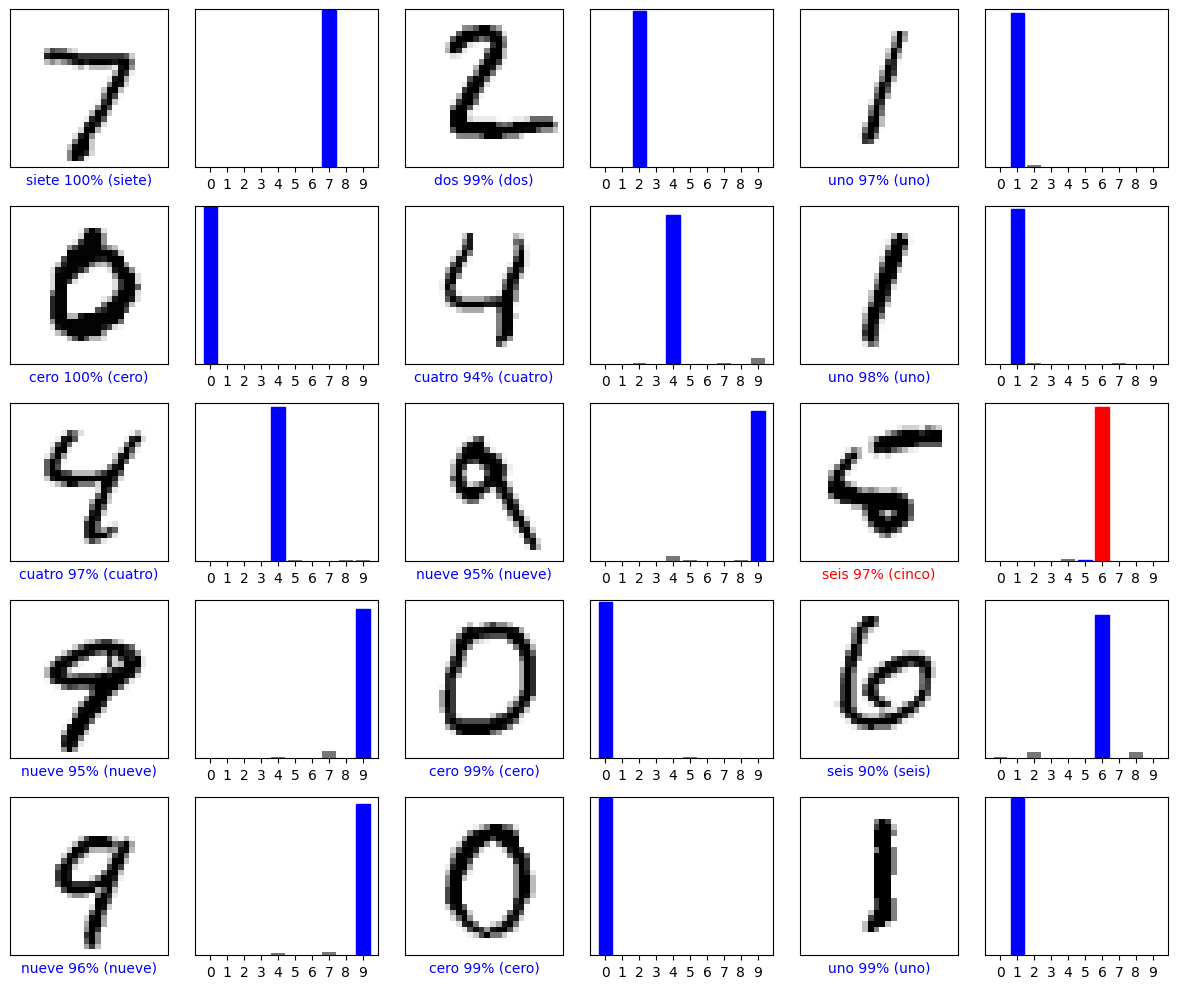

In [25]:
#ahora graficaremos varias imagenes 

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Ya con el modelo entrenado lo usaremos para hacer una prediccion con una imagen unica

In [26]:
#Escogemos una imagen del conjunto de datos 
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Agregamos la imagen a un batch donde se encuentra sola 
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora que nos prediga la etiqueta de la imagen

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 87ms/step
[[2.5848392e-03 8.0494847e-06 9.8653573e-01 2.6447834e-03 1.6411544e-10
  1.7743659e-03 4.5503411e-03 7.8017794e-11 1.9018665e-03 1.2001431e-09]]


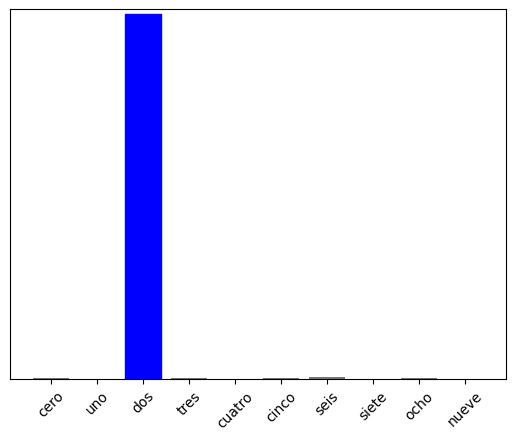

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2

El modelo predice que es la etiqueta 2 